<a href="https://colab.research.google.com/github/Puru-Gupta/IMDB_Sentiment_Analysis_Bidirectional_LSTM/blob/main/IMDB_Sentiment_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**IMDB Review**
This is a dataset for **binary sentiment** classification containing substantially more data than previous benchmark datasets. We provide a set of ***25,000 movie reviews for training***, and ***25,000 for testing***. There is additional unlabeled data for use as well.

In [ ]:
! pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 13 kB/s 


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
import random

In [ ]:
tf.__version__

'2.6.0'

##**Spliting DataSets** into train and test data with their Labels


In [ ]:
(X_train, y_train) ,(X_test, y_test)= imdb.load_data(num_words=10000, skip_top=50, seed=42)# No of unique word taken 10000



17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
len(X_train), len(X_test), type(X_train), X_train.shape

(25000, 25000, numpy.ndarray, (25000,))

Text(0.5, 1.0, '0 & 1 Distribution in test data')

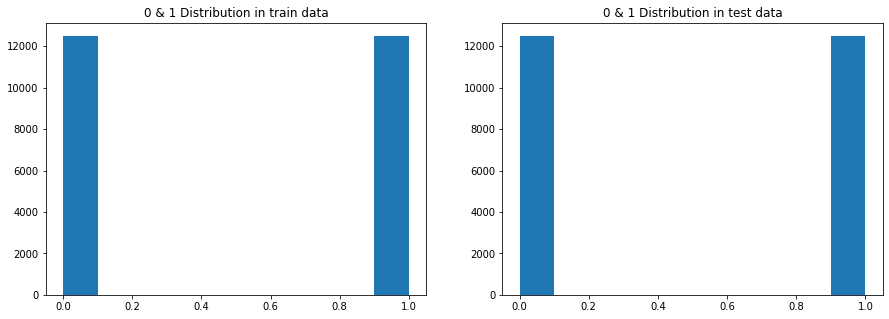

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(y_test)
plt.title("0 & 1 Distribution in train data")
plt.subplot(1, 2, 2)
plt.hist(y_train)  
plt.title("0 & 1 Distribution in test data")

In [ ]:
for i in random.sample(range(0, 25000), 10):
  #print(i)
  print("Lenght of review",len(X_train[i]))

Lenght of review 181
Lenght of review 204
Lenght of review 133
Lenght of review 399
Lenght of review 29
Lenght of review 159
Lenght of review 58
Lenght of review 114
Lenght of review 124
Lenght of review 153


In [ ]:
random.sample(range(0, 25000), 10)

[22961, 18379, 4111, 5852, 2645, 4807, 10604, 2676, 16006, 12532]

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding="pre",                                         
                                                             maxlen =300, truncating = "pre")
test_data = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding="pre" ,                                                        
                                                          maxlen =300, truncating = "pre")

In [ ]:
for i in random.sample(range(0, 25000), 10):
  #print(i)
  print("Lenght of review",len(train_data[i]))

Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250
Lenght of review 250


In [ ]:
index_word = imdb.get_word_index()
reverse_word_index = dict((value, key) for key, value in index_word.items())

In [ ]:
print(X_train[42])

[2, 2, 1033, 2395, 2, 5064, 2, 2, 7853, 1966, 2, 1413, 2, 2, 1309, 2, 2, 2, 2, 2, 3852, 88, 146, 199, 1081, 2, 2, 337, 2, 2, 157, 137, 2, 264, 2, 2, 127, 2, 52, 292, 397, 2, 749, 638, 2, 426, 339, 2, 235, 2, 2, 2, 93, 2, 2, 601, 2, 2, 2, 6193, 2, 3691, 1063, 274, 2, 2, 540, 2, 282, 2, 2, 2, 2, 7442, 361, 2, 131, 6193, 1890, 2, 2, 7279, 638, 98, 137, 2, 2, 2, 52, 962, 54, 343, 2, 2, 421, 2, 5451, 2, 2, 2, 2, 2, 9681, 2, 2, 274, 63, 2, 460, 205, 198, 242, 2, 9841, 2, 198, 89, 2, 421, 2, 2, 205, 2, 274, 2, 2, 1081, 2, 2, 157, 2, 238, 2, 128, 125, 9422, 2, 2]


In [ ]:
print(train_data[42])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    2    2 1033 2395    2 5064    2    2 7853 1966    2 1413    2    2
 1309    2    2    2    2    2 3852   88  146  199 1081    2    2  337
    2    2  157  137    2  264    2    2  127    2   52  292  397    2
  749  638    2  426  339    2  235    2    2    2   93    2    2  601
    2    2    2 6193    2 3691 1063  274    2    2  540    2  282    2
    2    2    2 7442  361    2  131 6193 1890    2    2 7279  638   98
  137 

###Helper Function 
For decoding the Review of movie

In [ ]:
def word_decode(review_number):
  word =[ ]
  for i in range(len(X_train[review_number])):
    encode = (list(X_train[review_number])[i])
    decode = reverse_word_index[encode]
    word.append(decode)
    #if i== len(X_train[review_number]):
    #  break  
  
  
  
  print(set(word))
  if y_train[review_number] ==1:
    print("Sentiment is: Positive")
  else:
    print("Sentiment is: Negative")


In [ ]:
word_decode(24000)

{'roy', 'actually', 'same', 'horrible', 'documentary', 'gas', 'w', 'pilot', 'suggest', 'intrigued', 'work', 'why', 'want', 'thing', 'possible', 'realistic', 'suggests', 'carried', 'whose', 'maria', 'your', 'went', 'women', 'warning', 'prisoners', 'japanese', 'while', 'every', 'masterpiece', 'perhaps', 'told', 'through', 'reveal', 'men', 'express', 'claire', 'lab', 'tight', 'drama', 'crowd', 'himself', 'sometimes', 'apparently', 'contrast', 'lost', 'miserably', 'held', 'comedies', 'fun', "i'm", 'enough', 'kids', 'karloff', 'dawson', 'dark', 'numbers', 'long', 'case', 'except', 'silent', 'cannot', 'two', 'mention', 'new', 'and', 'girl', 'nevertheless', 'sequence', 'korean', 'scene', 'fans', 'understand', 'minutes', 'stars', 'folks', 'man', "there's", 'war', 'dick', 'often', 'does', 'noticed', '2', 'guy', 'between', 'watched', 'times', 'over', 'someone', 'effects', 'road', 'destroy', 'lesbian', 'never', 'put', 'best', 'almost', 'allow', 'david', 'screen', 'caine', 'now', 'take', 'watch', 

In [ ]:
train_data.shape, test_data.shape

###First Model
Embedding layares<br>
Bdirectional Recurrent Neural Networks

In [ ]:
tf.random.set_seed(42)
model_1 =  tf.keras.Sequential([
                              tf.keras.layers.Embedding(20000,64, input_length = 250), 
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25, dropout=0.2)),#Bidirectional Recurrent Neural Networks
                              
                              #tf.keras.layers.LSTM(60, activation ='tanh'),
                              tf.keras.layers.Dense(10, activation ="relu"),
                              #tf.keras.layers.GlobalAveragePooling1D(),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Flatten(),  
                              tf.keras.layers.Dense(1, activation ="sigmoid")])


#Comile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
History_1 = model_1.fit(train_data, y_train, epochs =10, batch_size =128, validation_data =(test_data, y_test))

Epoch 1/10
196/196 [==============================] - 82s 402ms/step - loss: 0.5440 - accuracy: 0.7098 - val_loss: 0.3508 - val_accuracy: 0.8551
Epoch 2/10
196/196 [==============================] - 79s 403ms/step - loss: 0.2900 - accuracy: 0.8856 - val_loss: 0.3151 - val_accuracy: 0.8677
Epoch 3/10
196/196 [==============================] - 78s 398ms/step - loss: 0.2373 - accuracy: 0.9100 - val_loss: 0.3405 - val_accuracy: 0.8541
Epoch 4/10
196/196 [==============================] - 79s 406ms/step - loss: 0.1971 - accuracy: 0.9253 - val_loss: 0.3299 - val_accuracy: 0.8646
Epoch 5/10
196/196 [==============================] - 79s 406ms/step - loss: 0.1643 - accuracy: 0.9393 - val_loss: 0.3885 - val_accuracy: 0.8522
Epoch 6/10
196/196 [==============================] - 82s 417ms/step - loss: 0.1515 - accuracy: 0.9435 - val_loss: 0.4072 - val_accuracy: 0.8564
Epoch 7/10
196/196 [==============================] - 82s 419ms/step - loss: 0.1231 - accuracy: 0.9551 - val_loss: 0.4477 - val_ac

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 50)                18000     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 1,298,559
Trainable params: 1,298,559
Non-trainable params: 0
______________________________________________

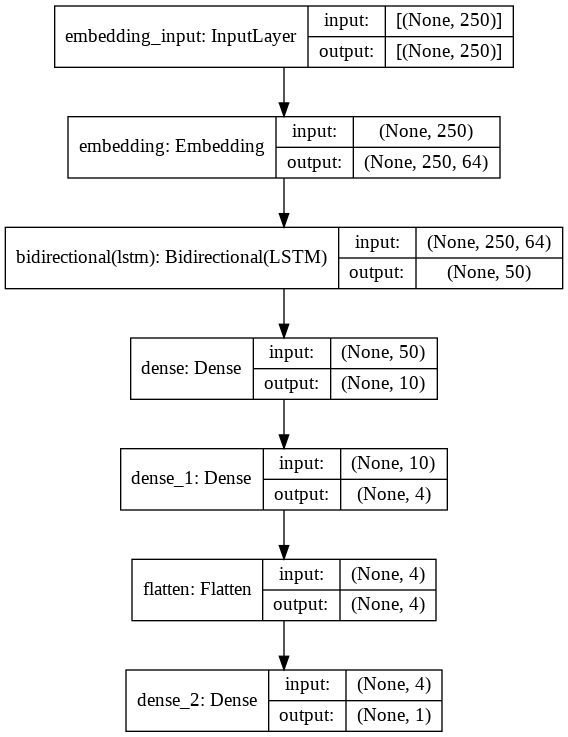

In [ ]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_1, show_shapes=True)

In [ ]:
y_pred_1 = model_1.predict(test_data)

(array([11029.,   604.,   406.,   298.,   288.,   286.,   316.,   459.,
          604., 10710.]),
 array([7.9244564e-06, 9.9982254e-02, 1.9995658e-01, 2.9993090e-01,
        3.9990523e-01, 4.9987957e-01, 5.9985387e-01, 6.9982821e-01,
        7.9980254e-01, 8.9977688e-01, 9.9975121e-01], dtype=float32),
 <a list of 10 Patch objects>)

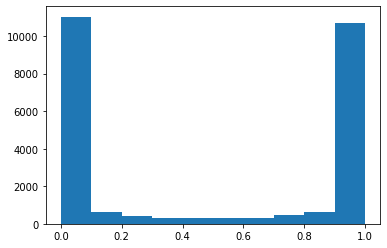

In [ ]:
plt.hist(y_pred_1)

**plot_loss_curve**<br>
this is helper function for visualization of ***loss curve.***

In [ ]:
def plot_loss_curve(history):

  train_loss =history.history["loss"]
  train_accuracy = history.history["accuracy"]

  val_loss =history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history['loss']))
  plt.figure(figsize =(15,5))
  plt.subplot(1,2,1)
#plot
  plt.plot(epochs, train_loss, label ="Training_Loss")
  plt.plot(epochs, val_loss, label ="Val_loss")
  plt.xlabel("epochs")
  plt.title("Path trace by training and validation loss curve")
  plt.legend()

#plot
  plt.subplot(1,2,2)
  plt.plot(epochs, train_accuracy, label= "Train_accuracy")
  plt.plot(epochs, val_accuracy, label ="Val_accuracy") 
  plt.xlabel("epochs")
  plt.ylabel("Accuracy")
  plt.title("Path trace by training and validation Accuracy curve")
  plt.legend()



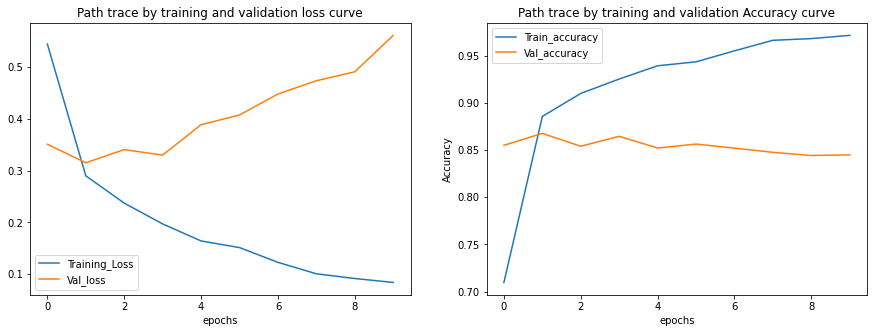

In [ ]:
plot_loss_curve(History_1)

Text(0, 0.5, 'Loss')

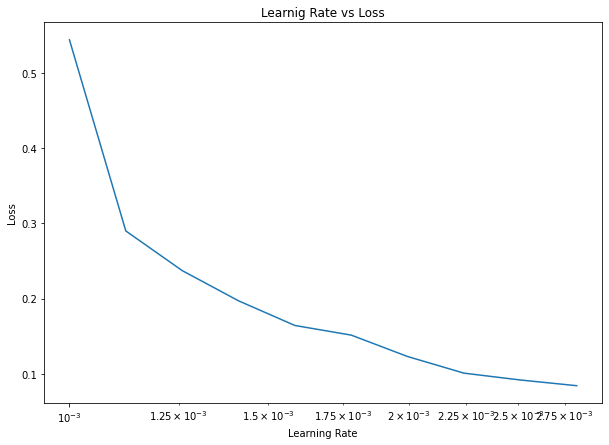

In [ ]:
# Plot the learning rate versus the loss
import numpy as np
lrs = 1e-3 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, History_1.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.title("Learnig Rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
tf.math.confusion_matrix(y_test, tf.round(y_pred_1))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10624,  1876],
       [ 2001, 10499]], dtype=int32)>

###Second Model 
Used Global Average pooling to extract import words

In [ ]:
tf.random.set_seed(121)
lstm_out = 25

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Embedding(10000, 256, input_length=train_data.shape[1]),
                               tf.keras.layers.SpatialDropout1D(0.3),
                               tf.keras.layers.LSTM(lstm_out, dropout=0.2,return_sequences=True),
                               #tf.keras.layers.LSTM(lstm_out, dropout=0.2,return_sequences=True),
                               tf.keras.layers.Dense(200, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               #tf.keras.layers.GlobalAveragePooling1D(),
                               tf.keras.layers.GlobalAveragePooling1D(),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# #Comile the model

# model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#               optimizer =tf.keras.optimizers.Adam(learning_rate=0.000001),
#               metrics = ["accuracy"])

# lr_scheduler_2 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# # Fit the model
# History_2 = model_2.fit(train_data, y_train, epochs =5 , batch_size =64, validation_data =(test_data, y_test), callbacks= [lr_scheduler_2])
#Comile the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
History_2 = model_2.fit(train_data, y_train, epochs =10, batch_size =128, validation_data =(test_data, y_test))

Epoch 1/10
196/196 [==============================] - 17s 76ms/step - loss: 0.6912 - accuracy: 0.5214 - val_loss: 0.6750 - val_accuracy: 0.5437
Epoch 2/10
196/196 [==============================] - 14s 73ms/step - loss: 0.5306 - accuracy: 0.7640 - val_loss: 0.4142 - val_accuracy: 0.8314
Epoch 3/10
196/196 [==============================] - 14s 73ms/step - loss: 0.3714 - accuracy: 0.8470 - val_loss: 0.3601 - val_accuracy: 0.8493
Epoch 4/10
196/196 [==============================] - 14s 73ms/step - loss: 0.3076 - accuracy: 0.8788 - val_loss: 0.3400 - val_accuracy: 0.8601
Epoch 5/10
196/196 [==============================] - 14s 73ms/step - loss: 0.2698 - accuracy: 0.8950 - val_loss: 0.3265 - val_accuracy: 0.8617
Epoch 6/10
196/196 [==============================] - 14s 73ms/step - loss: 0.2414 - accuracy: 0.9061 - val_loss: 0.3204 - val_accuracy: 0.8659
Epoch 7/10
196/196 [==============================] - 14s 73ms/step - loss: 0.2206 - accuracy: 0.9166 - val_loss: 0.3312 - val_accuracy:

This model slightly improvement can be seen (4% at 2nd epochs)

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 256)          2560000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250, 25)           28200     
_________________________________________________________________
dense_8 (Dense)              (None, 250, 200)          5200      
_________________________________________________________________
dense_9 (Dense)              (None, 250, 100)          20100     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [ ]:
y_pred_2 = model_2.predict(test_data)

###Confusion Matrix for test data

In [ ]:
tf.math.confusion_matrix(y_test, tf.round(y_pred_2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10658,  1842],
       [ 1683, 10817]], dtype=int32)>

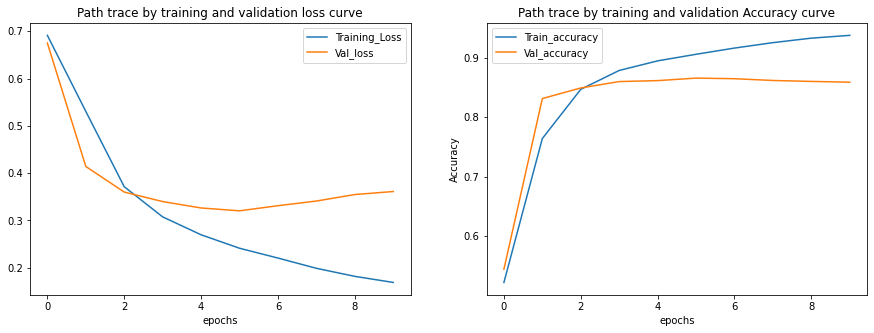

In [ ]:
plot_loss_curve(History_2)

Here Graph is showing learning rate with loss

Text(0, 0.5, 'Loss')

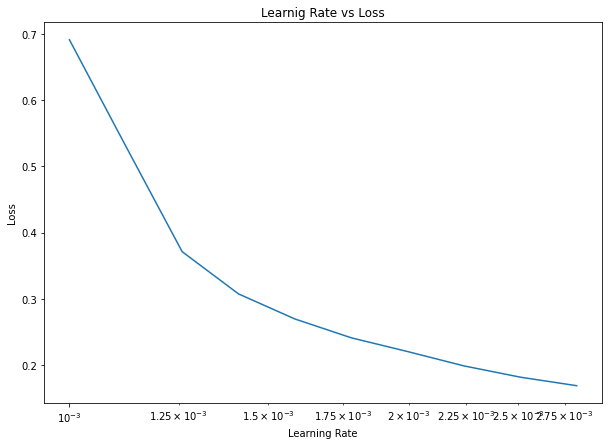

In [ ]:
# Plot the learning rate versus the loss
import numpy as np
lrs = 1e-3 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, History_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.title("Learnig Rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

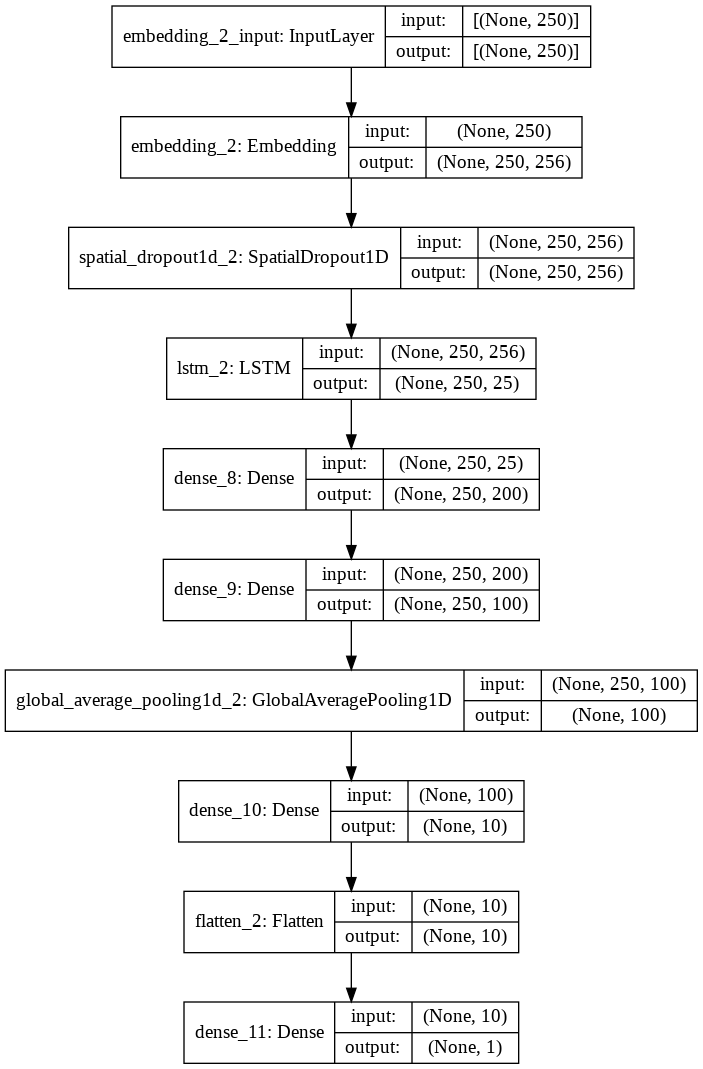

In [ ]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_2, show_shapes=True)

(array([12500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

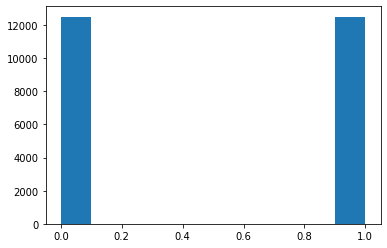

In [ ]:
plt.hist(y_test)  

In [ ]:
text = ("this movie is good")

In [ ]:
word_decode(148)

{'and', 'actually', 'saying', '11', 'than', 'more', 'those', 'real', 'us', 'wonder', 'makes', 'screwed', 'your', 'because', 'wife', 'started', 'no', 'may', 'filmmakers', 'against', 'get', 'serious', 'into', 'where', 'having', 'story', 'wishing', 'suspense', 'ever', 'point', 'dark', 'could', 'up', 'screen', 'had', 'lot', 'america', 'still', 'though', 'part', 'boy', 'saw', 'face', 'rating', 'fast', 'horribly', 'comedy'}
Sentiment is: Positive


In [ ]:
y_pred2 = model_2.predict(train_data)



In [ ]:
y_pred2[148]

array([0.988906], dtype=float32)

Confusion Matrix for Train Data

In [ ]:
tf.math.confusion_matrix(y_train, tf.round(y_pred2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11875,   625],
       [  475, 12025]], dtype=int32)>

###Scope of Model Improvement

###**Scope for Improvement**
There are a few things we could try to continue to improve our model:
* Increase the number of model layers (adding more LSTM layers).
* Increase the batch size
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).

Adjusting each of these settings during model development is usually referred to as **hyperparameter tuning**.




